In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./annotations_processed.csv", infer_datetime_format=True, parse_dates=["Start", "End"])
for i, x in df.iterrows():
    if df.loc[i, "Phase"][-1] == "2":
        df.loc[i, "Phase"] = df.loc[i, "Phase"][:-1]
cat = np.concatenate([(df["Phase"] == x).values.reshape(len(df), 1) for x in ["PIN", "POUT", "PREP", "TRS", "LAC"]], axis=1)
df = df[np.any(cat, axis=1)]

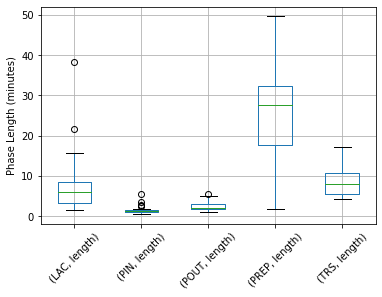

In [6]:
labels = ["LAC", "PIN", "POUT", "PREP", "TRS"]
df["length"] = [x.total_seconds() / 60 for x in (df["End"].values - df["Start"].values)]
plt.figure()
grp = df[["length", "Phase"]].groupby("Phase")
grp.boxplot("length", rot=45,figsize=(8,10), labels=labels)
plt.ylabel("Phase Length (minutes)")
plt.show()

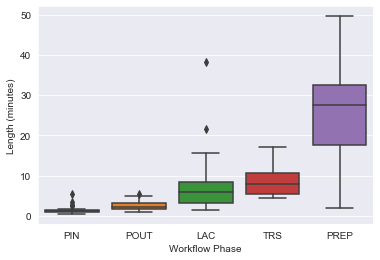

In [38]:
sns.set_style("darkgrid")
p = sns.boxplot(x="Phase", y="length", data=df[["Phase", "length"]])
p.set( xlabel = "Workflow Phase", ylabel = "Length (minutes)")
fig = p.get_figure()
fig.savefig("/data/writing/workflow/images/distrubtion_plot.png") 

In [63]:
summary = df[["length", "Phase"]].groupby("Phase").agg(['mean', 'median', 'std', 'count']).round(2)
summary[('length', "total")] = summary[('length', "mean")] * summary[('length', "count")]

In [64]:
summary

length                            
        mean median    std count   total
Phase                                   
LAC     8.91   5.96   9.27    17  151.47
PAO     9.37   8.27   7.54    11  103.07
PIN     1.53   1.28   0.97    33   50.49
POUT    2.52   2.11   1.33    17   42.84
PREP   24.77  27.61  12.54    16  396.32
TIP    14.19   4.48  16.42    22  312.18
TRS     8.68   7.88   3.80    18  156.24